# Using OASIS-1 and OASIS-2 dataset for classification

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_cs = pd.read_csv('data/oasis_cross-sectional.csv')
df_cs

,ID,M/F,Hand,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Delay
0,OAS1_0001_MR1,F,R,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,NaN
1,OAS1_0002_MR1,F,R,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,NaN
2,OAS1_0003_MR1,F,R,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,NaN
3,OAS1_0004_MR1,M,R,28,NaN,NaN,NaN,NaN,1588,0.803,1.105,NaN
4,OAS1_0005_MR1,M,R,18,NaN,NaN,NaN,NaN,1737,0.848,1.010,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
431,OAS1_0285_MR2,M,R,20,NaN,NaN,NaN,NaN,1469,0.847,1.195,2.0
432,OAS1_0353_MR2,M,R,22,NaN,NaN,NaN,NaN,1684,0.790,1.042,40.0
433,OAS1_0368_MR2,M,R,22,NaN,NaN,NaN,NaN,1580,0.856,1.111,89.0
434,OAS1_0379_MR2,F,R,20,NaN,NaN,NaN,NaN,1262,0.861,1.390,2.0


In [4]:
df_long = pd.read_csv('data/oasis_longitudinal.csv')
df_long

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


### Cleaning the data to make it suitable for classification

In [5]:
print('For cross-sectional dataset')
print(df_cs.isna().sum())

print("\n")

print('For longitudinal dataset')
print(df_long.isna().sum())

For cross-sectional dataset
ID         0
M/F        0
Hand       0
Age        0
Educ     201
SES      220
MMSE     201
CDR      201
eTIV       0
nWBV       0
ASF        0
Delay    416
dtype: int64


For longitudinal dataset
Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64


In [6]:
df_cs['Group'] = df_cs['CDR'].apply(lambda x: 'Demented' if x > 0 else 'Nondemented')

In [7]:
df_cs.dropna(subset = ['CDR'], inplace = True)
df_cs.dropna(subset = ['SES'], inplace = True)
df_cs.drop(columns = ['ID', 'Hand', 'Delay'], inplace = True)

In [8]:
print('For cross-sectional dataset')
print(df_cs.isna().sum())

For cross-sectional dataset
M/F      0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
dtype: int64


In [9]:
df_cs.shape

(216, 10)

In [10]:
df_cs

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,Nondemented
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,Nondemented
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,Demented
8,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,Nondemented
9,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,Nondemented
...,...,...,...,...,...,...,...,...,...,...
411,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355,Demented
412,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142,Demented
413,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297,Nondemented
414,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,Nondemented


In [11]:
df_cs = df_cs.reset_index(drop=True)

In [12]:
df_cs

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,Nondemented
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,Nondemented
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,Nondemented
4,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,Nondemented
...,...,...,...,...,...,...,...,...,...,...
211,F,70,1.0,4.0,29.0,0.5,1295,0.748,1.355,Demented
212,F,73,3.0,2.0,23.0,0.5,1536,0.730,1.142,Demented
213,F,61,2.0,4.0,28.0,0.0,1354,0.825,1.297,Nondemented
214,M,61,5.0,2.0,30.0,0.0,1637,0.780,1.072,Nondemented


In [13]:
df_long.dropna(subset = ['SES'], inplace = True)
df_long.dropna(subset = ['MMSE'], inplace = True)

In [14]:
df_long = df_long.rename(columns = {'EDUC': 'Educ'})
df_long.drop(columns = ['Subject ID', 'MRI ID', 'Visit', 'MR Delay', 'Hand'], inplace = True)

In [15]:
mask = (df_long['CDR'] > 0) & (df_long['Group'] == 'Nondemented')

df_long = df_long[~mask]

In [16]:
df_long.shape

(352, 10)

In [17]:
df_long

,Group,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,F,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,F,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,M,80,12,4.0,28.0,0.0,1689,0.712,1.039
...,...,...,...,...,...,...,...,...,...,...
368,Demented,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,Demented,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,Nondemented,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,Nondemented,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [18]:
# df_long is your DataFrame with 'Group' column as the first column
# Get the 'Group' column
group_column = df_long.pop('Group')

# Add the 'Group' column to the DataFrame at the last position
df_long['Group'] = group_column

# Now, the 'Group' column is moved from the first position to the last position

In [19]:
df_long

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,Nondemented
1,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,Nondemented
5,F,88,18,3.0,28.0,0.0,1215,0.710,1.444,Nondemented
6,F,90,18,3.0,27.0,0.0,1200,0.718,1.462,Nondemented
7,M,80,12,4.0,28.0,0.0,1689,0.712,1.039,Nondemented
...,...,...,...,...,...,...,...,...,...,...
368,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,Demented
369,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,Demented
370,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
371,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


In [20]:
df_cs = df_cs.reset_index(drop=True)
df_long = df_long.reset_index(drop=True)

In [21]:
# Concatenate along rows

df = pd.concat([df_cs, df_long])
df

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,Nondemented
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,Nondemented
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,Nondemented
4,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,Nondemented
...,...,...,...,...,...,...,...,...,...,...
347,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,Demented
348,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,Demented
349,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
350,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


In [22]:
df = df.reset_index(drop=True)

In [23]:
df.isna().sum()

M/F      0
Age      0
Educ     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
dtype: int64

In [24]:
df

,M/F,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,F,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,Nondemented
1,F,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,Nondemented
2,F,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,Demented
3,M,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,Nondemented
4,F,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,Nondemented
...,...,...,...,...,...,...,...,...,...,...
563,M,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,Demented
564,M,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,Demented
565,F,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,Nondemented
566,F,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,Nondemented


In [25]:
# Print data types of each column
print(df.dtypes)

M/F       object
Age        int64
Educ     float64
SES      float64
MMSE     float64
CDR      float64
eTIV       int64
nWBV     float64
ASF      float64
Group     object
dtype: object


In [26]:
df['M/F'] = df['M/F'].map({'M': 1, 'F': 0})
df = df.rename(columns = {'M/F': 'Gender'})

df['Group'] = df['Group'].map({'Demented': 1, 'Nondemented': 0})

In [27]:
df

,Gender,Age,Educ,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,0,74,2.0,3.0,29.0,0.0,1344,0.743,1.306,0.0
1,0,55,4.0,1.0,29.0,0.0,1147,0.810,1.531,0.0
2,0,73,4.0,3.0,27.0,0.5,1454,0.708,1.207,1.0
3,1,74,5.0,2.0,30.0,0.0,1636,0.689,1.073,0.0
4,0,52,3.0,2.0,30.0,0.0,1321,0.827,1.329,0.0
...,...,...,...,...,...,...,...,...,...,...
563,1,82,16.0,1.0,28.0,0.5,1693,0.694,1.037,1.0
564,1,86,16.0,1.0,26.0,0.5,1688,0.675,1.040,1.0
565,0,61,13.0,2.0,30.0,0.0,1319,0.801,1.331,0.0
566,0,63,13.0,2.0,30.0,0.0,1327,0.796,1.323,0.0


In [28]:
df.isna().sum()

Gender     0
Age        0
Educ       0
SES        0
MMSE       0
CDR        0
eTIV       0
nWBV       0
ASF        0
Group     37
dtype: int64

In [29]:
# Convert 'Group' column to 1 if 'CDR' > 0 else 0

df['Group'] = (df['CDR'] > 0).astype(int)

In [30]:
df.isna().sum()

Gender    0
Age       0
Educ      0
SES       0
MMSE      0
CDR       0
eTIV      0
nWBV      0
ASF       0
Group     0
dtype: int64

In [31]:
df.dtypes

Gender      int64
Age         int64
Educ      float64
SES       float64
MMSE      float64
CDR       float64
eTIV        int64
nWBV      float64
ASF       float64
Group       int32
dtype: object

In [32]:
# Assuming df is your DataFrame and you want to drop the 'CDR' column
df.drop('CDR', axis=1, inplace=True)

In [33]:
df = df.reset_index(drop=True)

In [34]:
df

,Gender,Age,Educ,SES,MMSE,eTIV,nWBV,ASF,Group
0,0,74,2.0,3.0,29.0,1344,0.743,1.306,0
1,0,55,4.0,1.0,29.0,1147,0.810,1.531,0
2,0,73,4.0,3.0,27.0,1454,0.708,1.207,1
3,1,74,5.0,2.0,30.0,1636,0.689,1.073,0
4,0,52,3.0,2.0,30.0,1321,0.827,1.329,0
...,...,...,...,...,...,...,...,...,...
563,1,82,16.0,1.0,28.0,1693,0.694,1.037,1
564,1,86,16.0,1.0,26.0,1688,0.675,1.040,1
565,0,61,13.0,2.0,30.0,1319,0.801,1.331,0
566,0,63,13.0,2.0,30.0,1327,0.796,1.323,0


### Data splitting for model evaluation

In [35]:
# X contains the features (all columns except 'Group')
X = df.drop('Group', axis=1)

# y contains the target variable ('Group' column)
y = df['Group']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, roc_curve, auc, classification_report

### Classification by normal models like Logistic Classifier, SVC and DEcision Tree Classifier

In [38]:
# For Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

logreg_classifier = LogisticRegression(random_state=42)

logreg_classifier.fit(X_train, y_train)

logreg_predictions = logreg_classifier.predict(X_test)

logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.7719298245614035


In [39]:
# For DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

dt_predictions = dt_classifier.predict(X_test)

dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Classifier Accuracy:", dt_accuracy)

Decision Tree Classifier Accuracy: 0.7894736842105263


In [40]:
# For DecisionTree Classifier

from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, y_train)

svm_predictions = svm_classifier.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Classifier Accuracy:", svm_accuracy)

SVM Classifier Accuracy: 0.5614035087719298


### Ensemble techniques like AdaBoost, XGBoost, Gradient Boost and Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the hyperparameters and their possible values for randomized search
rf_param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'max_depth': [None] + list(np.arange(10, 51, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform Randomized Search to find the best hyperparameters
random_search_rf = RandomizedSearchCV(estimator=rf_classifier, param_distributions=rf_param_dist, n_iter=10, cv=5, random_state=42)
random_search_rf.fit(X_train, y_train)

# Get the best parameters and train the model with them
best_params_rf = random_search_rf.best_params_
rf_classifier = RandomForestClassifier(random_state=42, **best_params_rf)
rf_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
rf_predictions = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, rf_predictions)
print("Random Forest Classifier Accuracy after Randomized Search:", accuracy_rf)

Random Forest Classifier Accuracy after Randomized Search: 0.8888888888888888


In [42]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

adaboost_param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': [0.01, 0.1, 1.0, 2.0]
}

adaboost_classifier = AdaBoostClassifier(random_state=42)

random_search_adaboost = RandomizedSearchCV(estimator=adaboost_classifier, param_distributions=adaboost_param_dist, n_iter=10, cv=5, random_state=42)
random_search_adaboost.fit(X_train, y_train)

best_params_adaboost = random_search_adaboost.best_params_
adaboost_classifier = AdaBoostClassifier(random_state=42, **best_params_adaboost)
adaboost_classifier.fit(X_train, y_train)

adaboost_predictions = adaboost_classifier.predict(X_test)

accuracy_adaboost = accuracy_score(y_test, adaboost_predictions)
print("AdaBoost Classifier Accuracy after Randomized Search:", accuracy_adaboost)

AdaBoost Classifier Accuracy after Randomized Search: 0.7894736842105263


In [43]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

xgb_param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4]
}

xgb_classifier = xgb.XGBClassifier(random_state=42)

random_search_xgb = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=xgb_param_dist, n_iter=10, cv=5, random_state=42)
random_search_xgb.fit(X_train, y_train)

best_params_xgb = random_search_xgb.best_params_
xgb_classifier = xgb.XGBClassifier(random_state=42, **best_params_xgb)
xgb_classifier.fit(X_train, y_train)

xgb_predictions = xgb_classifier.predict(X_test)

accuracy_xgb = accuracy_score(y_test, xgb_predictions)
print("XGBoost Classifier Accuracy after Randomized Search:", accuracy_xgb)

XGBoost Classifier Accuracy after Randomized Search: 0.8304093567251462


In [44]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the hyperparameters and their possible values for randomized search
gb_param_dist = {
    'n_estimators': np.arange(50, 251, 50),
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Perform Randomized Search to find the best hyperparameters
random_search_gb = RandomizedSearchCV(estimator=gb_classifier, param_distributions=gb_param_dist, n_iter=10, cv=5, random_state=42)
random_search_gb.fit(X_train, y_train)

# Get the best parameters and train the model with them
best_params_gb = random_search_gb.best_params_
gb_classifier = GradientBoostingClassifier(random_state=42, **best_params_gb)
gb_classifier.fit(X_train, y_train)

# Make predictions and evaluate the model
gb_predictions = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Classifier Accuracy after Randomized Search:", accuracy_gb)

Gradient Boosting Classifier Accuracy after Randomized Search: 0.8538011695906432


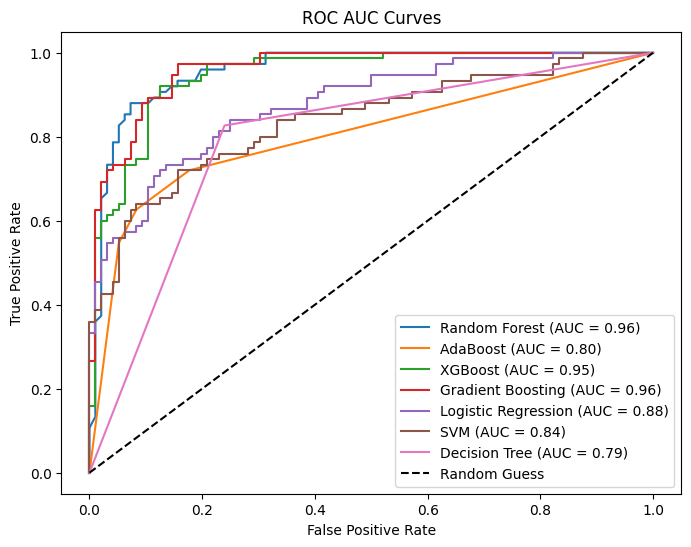

In [45]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

classifiers = {
    'Random Forest': rf_classifier,
    'AdaBoost': adaboost_classifier,
    'XGBoost': xgb_classifier,
    'Gradient Boosting': gb_classifier,
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}

# Calculate ROC AUC scores and plot ROC AUC curves for each classifier
plt.figure(figsize=(8, 6))
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{clf_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curves')
plt.legend()
plt.show()